# Oscilador armónico amortiguado: sub, crítica y sobreamortiguado
Víctor A. Bettachini

bettachini@df.uba.ar

Copyright Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
# constantes generales
g= 9.81 # [m/s^2]

## Péndulo

A efectos de presentar código Python útil para graficar la respuesta temporal de sistemas a continuación se muestra un ejmplo para la dinámica del péndulo ideal según
$\psi(t)= \psi_0 \cos{\left( \omega t + \phi_0 \right)}$.

La amplitud en el tiempo inicial $\psi_0$ se nota con la variable ```pen_0```.
La fase $\phi_0$ como ```phi_0```.

In [3]:
# condiciones inicales péndulo
pen_0 = 2 # [⁰] amplitud inicial en grados
pen_0 *= np.pi/180 # [radianes] grados -> radianes
phi_0 = 0 # [radianes] fase inicial
l = 1 #  [m] longitud de la cuerda
omega = np.sqrt(g/l) # frecuencia de oscilación
def pen(t):
    return pen_0 *np.cos(omega*t+phi_0)

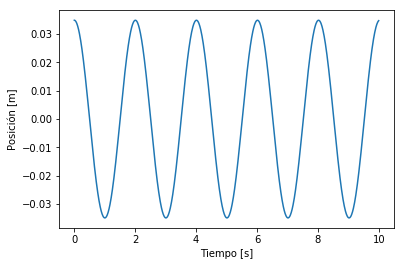

In [4]:
# graficación péndulo
tempo = np.linspace(0,10,int(1E3))
outPen = pen(tempo)
plt.plot(tempo,outPen)
plt.ylabel('Posición [m]')
plt.xlabel('Tiempo [s]')
plt.show()

## Oscilador sin resistencia
Si la posición de una masa $x$ es la de equilibrio $x_0$ mas un apartamiento $\psi$,
y la fuerza 
$\vec{F}= m \ddot{x} \hat{x}$ entonces $\vec{F}= m \ddot{\psi}$.

Un resorte de constante elástica $k$ provee la fuerza, por tanto $-k \psi = m \ddot{\psi}$.
De aquí se despeja $\ddot{\psi}= \omega \psi$ con $\omega= \sqrt{\frac{k}{m}}$.

Propuesta la solución $\psi(t)= C \mathrm{e}^{\lambda t}$ queda $(\lambda^2 + \omega^2 )  C \mathrm{e}^{\lambda t}= 0$. Luego $\lambda_{1,2}= \pm i \omega$ y entonces $\psi(t)= C_1 \mathrm{e}^{i \omega t} + C_1 \mathrm{e}^{-i \omega t}$.

Haciendo uso de la igualdad de Euler $\mathrm{e}^{\pm i \theta}= \cos{\theta}+ i \sin{\theta}$, agrupamos para obtener $\psi(t)= (C_1+ C_2) \cos{\omega t} + i(C_1- C_2) \sin{\omega t}$.

Este conjunto de constantes puede determinarse usando los datos a tiempo inicial $\psi(0)= C_1+ C_2$ y $\dot{\psi}(0)= i (C_1- C_2) \omega$.

Por tanto $$\psi(t)= \psi(0) \cos{\omega t} + \frac{\dot{\psi}(0)}{\omega} \sin{\omega t}.$$

Esto puede ser escrito con una fase $\phi= \arctan{\left( \frac{\dot{\psi}(0)}{\omega \psi{(0)}} \right)}$ y amplitud $U= \sqrt{\psi^2(0)+ \left(\frac{\dot{\psi}(0)}{\omega}\right)^2}$, quedando $$\psi(t)= U \cos{\left(\omega t + \phi\right)}.$$

In [5]:
# condiciones oscilador
m = 1E-1 # [kg] masa oscilador
k = 1 # [N/m] constante elástica resorte
psi_0 = 1E-2 # [m] amplitud oscilación a tiempo inicial
ppsi_0 = 0E-2 # [m/s] velocidad oscilación a tiempo inicial
omega = np.sqrt(k/m)

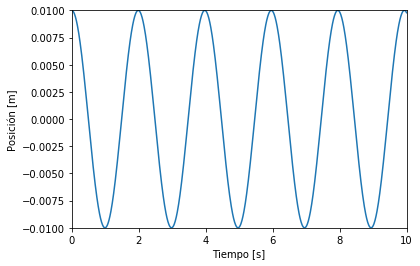

In [6]:
# graficación oscilador
def psiOsc(t):
    return psi_0 *(np.cos(omega*t)+ (ppsi_0/omega)* np.sin(omega* t) )

tiempo = 10 # [s]
tempo = np.linspace(0,tiempo,int(1E3))
outOsc = psiOsc(tempo)
plt.axis([0,tiempo,-psi_0,psi_0])
plt.plot(tempo,outOsc)
plt.ylabel('Posición [m]')
plt.xlabel('Tiempo [s]')
plt.show()

##  Oscilador amortiguado
Se agrega una fuerza opuesta y proporcional a la velocidad $-c \dot{\psi}$, así la 2.a ley queda $m \ddot{\psi}= - c \dot{\psi} - k \psi$ y entonces $\ddot{\psi}+ \frac{c}{m} \dot{\psi}+ \omega \psi= 0$.

Usualmente se denomina $\gamma= \frac{c}{m}$ así $\lambda_{1,2}= -\frac{\gamma}{2} \pm \sqrt{\left(\frac{\gamma}{2}\right)^2- \omega^2}$.
De acuerdo a si el valor dentro de la raíz $\omega'= \sqrt{\left(\frac{\gamma}{2}\right)^2- \omega^2}$ es negativo, positivo o nulo se presentan distintas dinámicas.

### oscilador sub amortiguado
Si el amortiguamiento es débil, $\frac{\gamma}{2} < \omega$, entonces subsiste el comportamiento oscilatorio, $\omega'= i \sqrt{\left| \left(\frac{\gamma}{2}\right)^2- \omega^2 \right|}$ y dinámica responde a $\psi(t)= A_1 \mathrm{e}^{- \frac{\gamma}{2} t} \cos{|\omega'| t}+ A_2 \mathrm{e}^{- \frac{\gamma}{2} t} \sin{|\omega'| t}$.

Contemplando las condiciones iniciales esta solución usualmente se escribe
$$\psi(t)= \mathrm{e}^{- \frac{\gamma}{2} t} \left( \psi(0) \cos{\omega' t} + \frac{\dot{\psi}(0)+ \frac{\gamma}{2} \psi(0)}{\omega'} \sin{\omega' t} \right),$$
donde $\omega'$ se refiere al valor absoluto de la raíz.

In [7]:
# condiciones adicionales subamortiguado
c = 1E-2 # [kg/s^2]
gamma = c/m # [1/s]
omegaPrima = np.sqrt(np.abs((gamma/2)**2- omega**2))

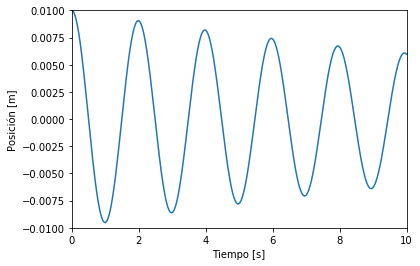

In [8]:
# graficación subamortiguado
def psiOscSub(t):
    return np.exp((-gamma/2)*t)* ( psi_0 * np.cos(omegaPrima*t)+ ((ppsi_0+ (gamma/2)* psi_0)/omegaPrima)* np.sin(omegaPrima* t) )

outOscSub = psiOscSub(tempo)
plt.axis([0,tiempo,-psi_0,psi_0])
plt.plot(tempo,outOscSub)
plt.ylabel('Posición [m]')
plt.xlabel('Tiempo [s]')
plt.show()

### Oscilador sobre amortiguado
Si por el contrario el amortiguamiento prima sobre la oscilación, $\frac{\gamma}{2} > \omega$, los valores de $\omega'$ son reales. Basta recordar que $\mathrm{e}^{\pm \theta}= \cosh{\theta} \pm \sinh{\theta}$ para arribar a la solución,
$$\psi(t)= \mathrm{e}^{- \frac{\gamma}{2} t} \left( \psi(0) \cosh{\omega' t} + \frac{\dot{\psi}(0)+ \frac{\gamma}{2} \psi(0)}{\omega'} \sinh{\omega' t} \right),$$
ahora con $\omega'$ real.

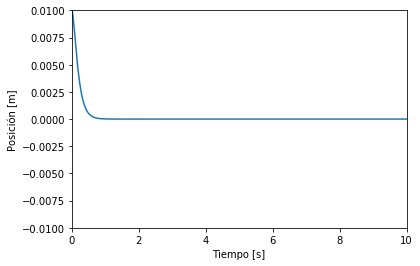

In [9]:
# condiciones adicionales subamortiguado
c = 2.1E0# [kg/s^2]
gamma = c/m # [1/s]

# graficación sobreamortiguado
def psiOscSob(t):
    return np.exp((-gamma/2)*t)* ( psi_0 * np.cosh(omegaPrima*t)+ ((ppsi_0+ (gamma/2)* psi_0)/omegaPrima)* np.sinh(omegaPrima* t)  )

outOscSob = psiOscSob(tempo)
plt.axis([0,tiempo,-psi_0, psi_0])
plt.plot(tempo,outOscSob)
plt.ylabel('Posición [m]')
plt.xlabel('Tiempo [s]')
plt.show()

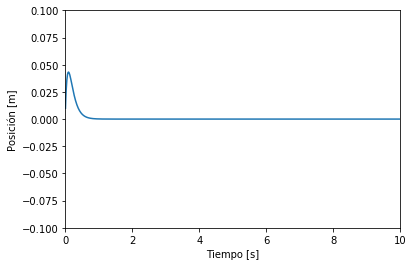

In [10]:
# condiciones adicionales subamortiguado - con velocidad inicial
c = 2.1E0# [kg/s^2]
gamma = c/m # [1/s]
ppsi_0 = 1E0 # [m/s] velocidad inicial

# graficación sobreamortiguado
def psiOscSobVel(t):
    return np.exp((-gamma/2)*t)* ( psi_0 * np.cosh(omegaPrima*t)+ ((ppsi_0+ (gamma/2)* psi_0)/omegaPrima)* np.sinh(omegaPrima* t)  )

outOscSobVel = psiOscSobVel(tempo)
plt.axis([0,tiempo,-10*psi_0, 10*psi_0])
plt.plot(tempo,outOscSobVel)
plt.ylabel('Posición [m]')
plt.xlabel('Tiempo [s]')
plt.show()

### Oscilador críticamente amortiguado
El caso en que $\frac{\gamma}{2}= \omega$ hace que $\lambda_1= \lambda_2 = - \omega$, así $\psi(t)= (A_1 + A_2 t) \mathrm{e}^{-\omega t}$.
La dinámica termina siendo dada por $$\psi(t)= \left[ \psi(0) +\left( \dot{\psi}(0)+ \omega \psi(0) t \right) \right] \mathrm{e}^{-\omega t}$$

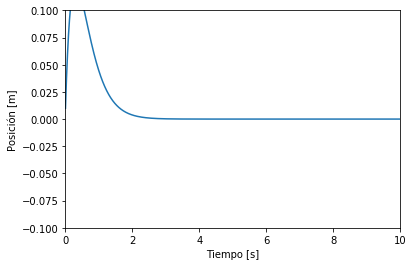

In [11]:
# condiciones adicionales críticamente amortiguado
gamma = 2* omega # [1/s]

# graficación sobreamortiguado
def psiOscCrit(t):
    return (psi_0+ (ppsi_0+ omega* psi_0)* t)* np.exp(-omega* t)

outOscCrit = psiOscCrit(tempo)
plt.axis([0,tiempo,-psi_0, psi_0])
plt.ylim([-0.1,0.1])
plt.plot(tempo,outOscCrit)
plt.ylabel('Posición [m]')
plt.xlabel('Tiempo [s]')
plt.show()